In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np


In [2]:
def gen_data(x):
    y = x * np.sin(x*10) + 1 
    y += np.random.uniform(0, 0.1, size=(len(y)))
    return y

In [3]:
# generate some fake data
x = np.linspace(0, 1, 50)
# x = x[::6]
y = gen_data(x)

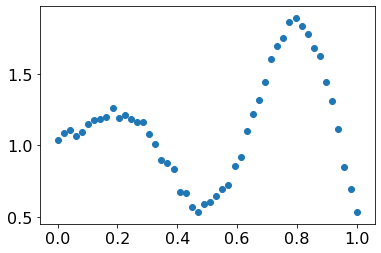

In [4]:
plt.figure()
plt.scatter(x, y)

In [5]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [6]:
X_train = x.reshape(-1, 1)

In [7]:
y_train = y

In [ ]:
Best: -1.210761 using {'meta_regressor__C': 100.0, 'meta_regressor__gamma': 100.0}


In [38]:
lr = LinearRegression()
svr_lin = SVR(kernel='linear')
# ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')
# svr_rbf = SVR(kernel='poly')

# stregr = StackingRegressor(regressors=[svr_lin, lr, ridge], 
#                            meta_regressor=svr_rbf)

stregr = StackingRegressor(regressors=[svr_lin, lr], 
                           meta_regressor=svr_rbf)

In [39]:
stregr.fit(X_train, y_train)

StackingRegressor(meta_regressor=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                     epsilon=0.1, gamma='scale', kernel='rbf',
                                     max_iter=-1, shrinking=True, tol=0.001,
                                     verbose=False),
                  refit=True,
                  regressors=[SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                  epsilon=0.1, gamma='scale', kernel='linear',
                                  max_iter=-1, shrinking=True, tol=0.001,
                                  verbose=False),
                              LinearRegression(copy_X=True, fit_intercept=True,
                                               n_jobs=None, normalize=False)],
                  store_train_meta_features=False,
                  use_features_in_secondary=False, verbose=0)

In [40]:
stregr.predict(X_train)

array([1.08938251, 1.11592073, 1.14219036, 1.16723546, 1.18997332,
       1.20922816, 1.22377708, 1.23240785, 1.2339867 , 1.22753375,
       1.21230233, 1.18785779, 1.15415052, 1.11157746, 1.0610264 ,
       1.00389742, 0.94209674, 0.87799938, 0.8143788 , 0.75430342,
       0.70100277, 0.65770781, 0.627473  , 0.61298947, 0.61640045,
       0.6391313 , 0.68174664, 0.74384646, 0.82401134, 0.91980456,
       1.02783512, 1.14388197, 1.26307521, 1.38012568, 1.48959062,
       1.5861594 , 1.6649417 , 1.72173922, 1.75328287, 1.75741922,
       1.73323336, 1.68109984, 1.60265828, 1.50071573, 1.37908307,
       1.2423573 , 1.09566517, 0.94438582, 0.79387113, 0.64918167])

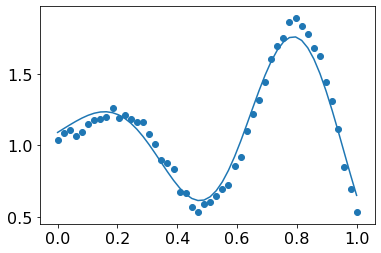

In [41]:
plt.figure()
plt.scatter(X_train, y_train)
plt.plot(X_train, stregr.predict(X_train))

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Initializing models

lr = LinearRegression()
svr_lin = SVR(kernel='linear')
# ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')
# svr_rbf = SVR(kernel='poly')
regressors = [svr_lin, lr]
stregr = StackingRegressor(regressors=regressors, 
                           meta_regressor=svr_rbf)

params = {
          'meta_regressor__C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.],
          'meta_regressor__gamma': [0.01, 0.1, 1.0, 10.0, 100.]}


# 10% cross validation
cv = int(len(y_train)*0.1)


grid = GridSearchCV(estimator=stregr, 
                    param_grid=params, 
                    cv=cv,
                    refit=True)
grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: -1.210761 using {'meta_regressor__C': 100.0, 'meta_regressor__gamma': 100.0}


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Initializing models

lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')
regressors = [svr_lin, lr, ridge]
stregr = StackingRegressor(regressors=regressors, 
                           meta_regressor=svr_rbf)

params = {
          'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.],
          'svr__C': [0.01, 0.1, 1.0, 10.0, 100.],
          'meta_regressor__C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000., 10000.],
          'meta_regressor__gamma': [0.01, 0.1, 1.0, 10.0, 100., 1000.]}


# 10% cross validation
cv = int(len(y_train)*0.1)


grid = GridSearchCV(estimator=stregr, 
                    param_grid=params, 
                    cv=cv,
                    refit=True)
grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: -0.114362 using {'meta_regressor__C': 10000.0, 'meta_regressor__gamma': 100.0, 'ridge__alpha': 10.0, 'svr__C': 0.1}


In [23]:
cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))
    if r > 10:
        break
print('...')

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

-8.183 +/- 7.34 {'meta_regressor__C': 0.01, 'meta_regressor__gamma': 0.01, 'ridge__alpha': 0.01, 'svr__C': 0.01}
-8.183 +/- 7.34 {'meta_regressor__C': 0.01, 'meta_regressor__gamma': 0.01, 'ridge__alpha': 0.01, 'svr__C': 0.1}
-8.184 +/- 7.34 {'meta_regressor__C': 0.01, 'meta_regressor__gamma': 0.01, 'ridge__alpha': 0.01, 'svr__C': 1.0}
-8.184 +/- 7.34 {'meta_regressor__C': 0.01, 'meta_regressor__gamma': 0.01, 'ridge__alpha': 0.01, 'svr__C': 10.0}
-8.184 +/- 7.34 {'meta_regressor__C': 0.01, 'meta_regressor__gamma': 0.01, 'ridge__alpha': 0.01, 'svr__C': 100.0}
-8.183 +/- 7.34 {'meta_regressor__C': 0.01, 'meta_regressor__gamma': 0.01, 'ridge__alpha': 0.1, 'svr__C': 0.01}
-8.183 +/- 7.34 {'meta_regressor__C': 0.01, 'meta_regressor__gamma': 0.01, 'ridge__alpha': 0.1, 'svr__C': 0.1}
-8.184 +/- 7.34 {'meta_regressor__C': 0.01, 'meta_regressor__gamma': 0.01, 'ridge__alpha': 0.1, 'svr__C': 1.0}
-8.184 +/- 7.34 {'meta_regressor__C': 0.01, 'meta_regressor__gamma': 0.01, 'ridge__alpha': 0.1, 'svr__

Mean Squared Error: 0.0034
Variance Score: 0.9761


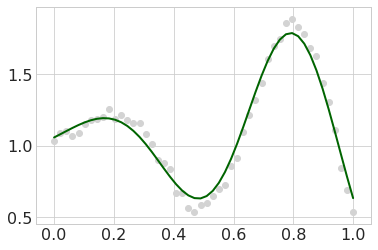

In [24]:
# Evaluate and visualize the fit
print("Mean Squared Error: %.4f"
      % np.mean((grid.predict(X_train) - y_train) ** 2))
print('Variance Score: %.4f' % grid.score(X_train, y_train))

with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(X_train, y_train, c='lightgray')
    plt.plot(X_train, grid.predict(X_train), c='darkgreen', lw=2)

plt.show()

In [25]:
%%timeit
grid.predict(X_train)

218 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
